In [1]:
import importlib
import gym_model
importlib.reload(gym_model)
from visualisation import JupyterVizGym, GymDrawer
from optimization import LayoutTemplate
import random

In [4]:
model_params = {
    "interarrival_time": {
        "type": "SliderInt",
        "value": 5,
        "label": "time between arrivals:",
        "min": 1,
        "max": 50,
        "step": 1,
    },
    "agent_exercise_duration": {
        "type": "SliderInt",
        "value": 30,
        "label": "mean exercise duration:",
        "min": 1,
        "max": 3 * 60,
        "step": 1,
    },
}

RANDOM_LAYOUT = False

if RANDOM_LAYOUT:
    model_params["machine_density"] ={
        "type": "SliderFloat",
        "value": 0.25,
        "label": "Density of gym equipment:",
        "min": 0.05,
        "max": 1,
        "step": 0.05,
    }
else:
    template = LayoutTemplate.square_isles(isle_rows=1, isle_cols=2)
    model_params["layout"] = template.instantiate([random.choice(list(gym_model.Equipment)) for _ in range(len(template))])
    model_params["spawn_location"] = template.entrance


page = JupyterVizGym(
    gym_model.Gym,
    model_params,
    measures=["Congestion", "Efficiency", "Utilization"],
    name="Test gym",
    agent_portrayal=lambda agent: agent.portrayal,
    # space_drawer="default",
    space_drawer=GymDrawer,
)

page

Cannot show ipywidgets in text

In [5]:
gym = gym_model.Gym(interarrival_time=5)

df = gym.run(1000, progress_bar=True)
df

Simulating gym: 100%|██████████| 1000/1000 [00:01<00:00, 901.50it/s, 123 agents]


,Utilization,Congestion
0,0.000000,1
1,1.000000,1
2,1.000000,1
3,1.000000,1
4,0.500000,1
...,...,...
995,0.983871,31
996,0.975806,31
997,0.983740,31
998,0.975410,31


In [7]:
df.mean()

Utilization    0.816667
Congestion     1.000000
dtype: float64

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 0), (1, 5), (2, 0), (2, 2), (2, 3), (2, 5), (3, 0), (3, 2), (3, 3), (3, 5), (4, 5), (5, 0), (5, 2), (5, 3), (5, 5), (6, 0), (6, 2), (6, 3), (6, 5), (7, 0), (7, 5), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5)]


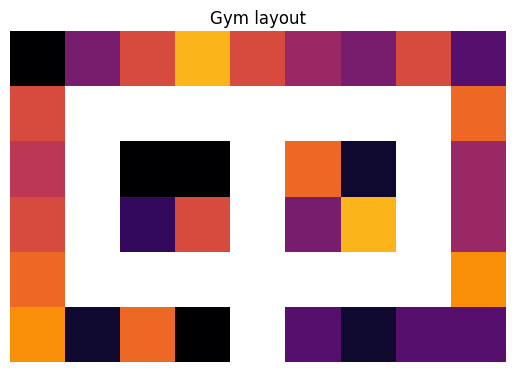

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from gym_agent import Muscle
from visualisation import draw_layout

tpl = LayoutTemplate.square_isles(isle_rows=1, isle_cols=2)
layout = tpl.instantiate([random.choice(list(gym_model.Equipment)) for _ in range(len(tpl))])
# print(list(zip(*np.where(layout != None))))
draw_layout(layout)
plt.show()
